# ST311 Assignment 3

## Candidate number: 43727

## Instructions

* There are FOUR questions. Questions 1-3 relate to Week 7 class, and Question 4 is based on Week 8 material. 

* The total marks is 56. 

* Save your notebook with the naming format: HW3_your candidate number


* Upload your completed notebook in HTML format. 

## [20 marks] Question 1: Convolutional Layer
1. Consider a network with only two convolutional layers (no activation function or pooling layers involved). We treat `X` as the input, `K1` as the kernel of the first convolutional layer and `K2`as the kernel of second convolutional layer. Given the `corr2d()` function, what is your output `Y` of this network?


In [39]:
import torch
from torch import nn
from d2l import torch as d2l
import torchtext

In [1]:
#For Question 1
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K1 = torch.tensor([[0.0, 1.0], [2.0, 3.0]]) # size: (2,2)
K2 = torch.tensor([[0.0, 1.0], [2.0, 3.0]]) # size: (2,2)

def corr2d(X, K):
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

In [2]:
X2 = corr2d(X,K1)
Y = corr2d(X2,K2)
Y

tensor([[228.]])

2. Instead of two convolutional layers, write a function to get the same result using only one convolutional layer. Call the function `trans_conv` which takes as arguments `K1` and `K2` and returns a kernel. Print the (weights of the) kernel. Verify you can use this function to obtain the same output `Y`.

(To clarify, stride is 1 and padding is 0 in this question.)

In [3]:
def trans_conv(X, K):
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return (Y*K).sum().view(-1,1)

In [4]:
Y1 = trans_conv(X, K1)
Y1

tensor([[228.]])

In [5]:
Y2 = trans_conv(X, K2)
Y2

tensor([[228.]])

## [10 marks] Question 2: Pooling
1. Reproduce the results of the following graph using Python. We set a = 1, b = 2 and treat values of all white squares as zero.

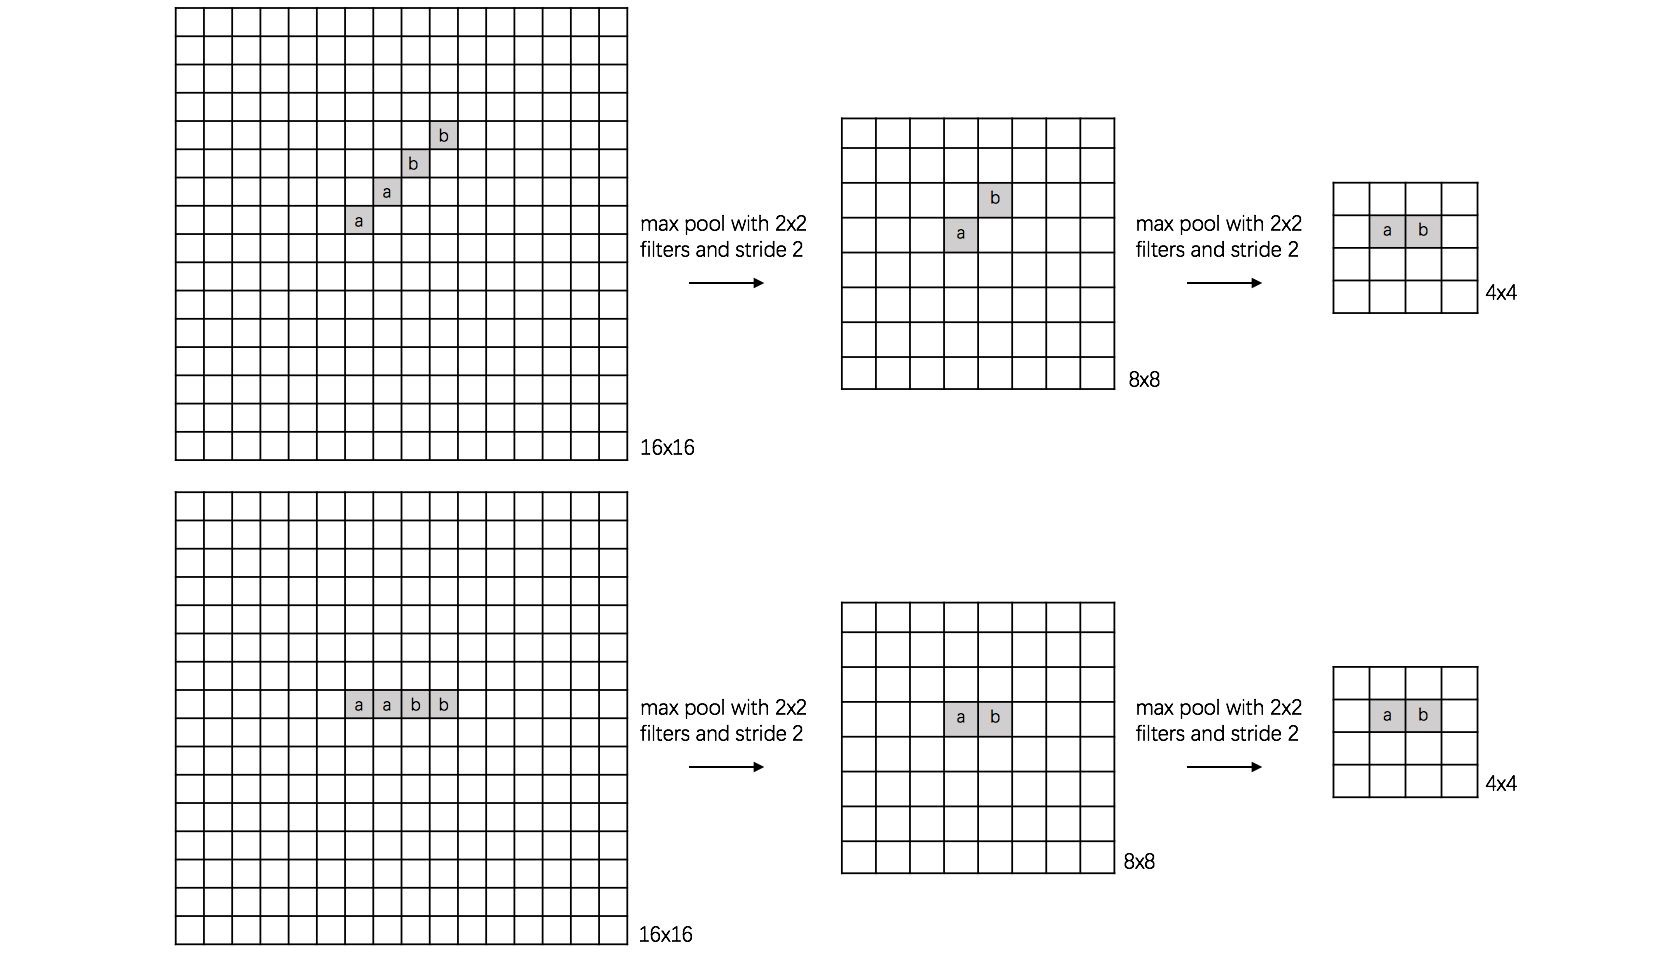





In [19]:
a = 1
b = 2
pool2d = nn.MaxPool2d((2,2),stride = 2)

In [20]:
X1 = torch.zeros((16, 16)).reshape((1,1,16,16))
X1[0,0,4,9] = b
X1[0,0,5,8] = b
X1[0,0,6,7] = a
X1[0,0,7,6] = a
print(X1,"\n\n",X1.shape)

tensor([[[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0

In [21]:
X1a = pool2d(X1)
X1b = pool2d(X1a)
print(X1a,"\n\n",X1a.shape,"\n\n",
      X1b,"\n\n",X1b.shape)

tensor([[[[0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 2., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.]]]]) 

 torch.Size([1, 1, 8, 8]) 

 tensor([[[[0., 0., 0., 0.],
          [0., 1., 2., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]]]) 

 torch.Size([1, 1, 4, 4])


In [22]:
X2 = torch.zeros((16, 16)).reshape((1,1,16,16))
X2[0,0,7, 6:8] = a
X2[0,0,7, 8:10] = b
print(X2,"\n\n",X2.shape)

tensor([[[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 1., 2., 2., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0

In [23]:
X2a = pool2d(X2)
X2b = pool2d(X2a)
print(X2a,"\n\n",X2a.shape,"\n\n",
      X2b,"\n\n",X2b.shape)

tensor([[[[0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 1., 2., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.]]]]) 

 torch.Size([1, 1, 8, 8]) 

 tensor([[[[0., 0., 0., 0.],
          [0., 1., 2., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]]]) 

 torch.Size([1, 1, 4, 4])


2. Instead of two max pooling layers, could you get the same result by one max pooling layer? If possible, what are values of kernel size and stride? Please confirm your idea with codes and show the corresponding output.

In [24]:
pool2d_v2 = nn.MaxPool2d((4,4),stride = 4)

In [29]:
X1_v2 = pool2d_v2(X1)
print(X1_v2,"\n\n",X1_v2.shape)

tensor([[[[0., 0., 0., 0.],
          [0., 1., 2., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]]]) 

 torch.Size([1, 1, 4, 4])


In [30]:
X2_v2 = pool2d_v2(X2)
print(X2_v2,"\n\n",X2_v2.shape)

tensor([[[[0., 0., 0., 0.],
          [0., 1., 2., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]]]) 

 torch.Size([1, 1, 4, 4])


## [10 marks] Question 3: LeNet

This question requires use of a GPU. If you don't have a GPU on your computer, use Colab. 

Update the original LeNet-5 by applying dropout ($p=0.5$), maxpooling and ReLU operations in appropriate places in the neural net architecture. Then train your model, NEW-LeNet-5, using with `d2l.train_ch6`. Enable the GPU on Colab for this task.

Compare the performance of your NEW-LeNet-5 with that of the original LeNet-5. 

In [ ]:
# #Starting code for Question 3
# !pip install d2l==0.17.0

In [46]:
torch.cuda.is_available()

False

In [33]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)
lr, num_epochs = 0.2, 10

In [34]:
net = nn.Sequential(
    #c1: conv2d with 6 ouput channels, kernel size=5, padding 2, sigmoid activation
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
    #s2: 2 x 2 ave. pooling, stride=2 (reduces w, h by factor of 2)
    nn.AvgPool2d(kernel_size=2, stride=2),
    #c3: conv2d with 16 output channel, kernel size=5,no padding, sigmoid activation
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    #s4: 2 x 2 ave. pooling, stride=2 
    nn.AvgPool2d(kernel_size=2, stride=2),
    #f5: flatten into 400 (=5^2*16) inputs, pass into FC with 120 outputs, sigmoid activation
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
    #f6: fc with 84 outputs, sigmoid activation
    nn.Linear(120, 84), nn.Sigmoid(),
    #output: fc with 10 outputs
    nn.Linear(84, 10))

loss 0.718, train acc 0.729, test acc 0.732
9113.9 examples/sec on cpu


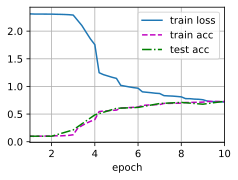

In [35]:
## To use the following function, you need to define the parameter `net` 
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [51]:
dropout1, dropout2 = 0.2, 0.5

new_net = nn.Sequential(
    #c1: conv2d with 6 ouput channels, kernel size=5, padding 2, ReLU activation
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.ReLU(),
    #s2: 2 x 2 max. pooling, stride=2 (reduces w, h by factor of 2)
    nn.MaxPool2d(kernel_size=2, stride=2),
    #c3: conv2d with 16 output channel, kernel size=5,no padding, ReLU activation
    nn.Conv2d(6, 16, kernel_size=5), nn.ReLU(),
    #s4: 2 x 2 max. pooling, stride=2 
    nn.MaxPool2d(kernel_size=2, stride=2),
    #f5: flatten into 400 (=5^2*16) inputs, pass into FC with 120 outputs, ReLU activation
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.ReLU(),
    # add a dropout layer after the first fully connected layer
    nn.Dropout(dropout1),
    #f6: fc with 84 outputs, ReLU activation
    nn.Linear(120, 84), nn.ReLU(),
    # add a dropout layer after the fully connected layer
    nn.Dropout(dropout2),
    #output: fc with 10 outputs
    nn.Linear(84, 10))

loss 0.342, train acc 0.879, test acc 0.871
9763.4 examples/sec on cpu


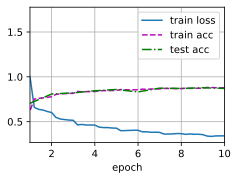

In [52]:
## To use the following function, you need to define the parameter `net` 
d2l.train_ch6(new_net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

## [16 marks] Question 4: GloVe word embedding

Open the Week 8 class notebook `ST311_GloVe` to answer the followin:

1. Display the output of
`print_closest_words(glove['king'] - glove['man'] + glove['woman'])`. Is the output what you expected? Provide an interpretation of what appears to be happening. Provide another example to illustrate your point.
1. Display the output of
`print_closest_words(glove['doctor'] - glove['man'] + glove['woman'])`
Provide a reason why this output is a concern when combining linear combination of word embeddings. Find another example to show the effect observed in the example is not an anomaly.

In [40]:
# The first time you run this will download a ~823MB file
glove = torchtext.vocab.GloVe(name="6B", # trained on Wikipedia 2014 corpus
                              dim=50)   # embedding size = 50

.vector_cache/glove.6B.zip: 862MB [15:03, 954kB/s]                              
100%|███████████████████████████████▉| 399999/400000 [00:06<00:00, 59333.63it/s]


In [42]:
def print_closest_words(vec, n=5):
    dists = torch.norm(glove.vectors - vec, dim=1)     # compute distances to all words
    lst = sorted(enumerate(dists.numpy()), key=lambda x: x[1]) # sort by distance
    for idx, difference in lst[1:n+1]:                         # take the top n
        print(glove.itos[idx], difference)

In [43]:
print_closest_words(glove['king'] - glove['man'] + glove['woman'])

queen 2.8391209
prince 3.661004
elizabeth 3.715252
daughter 3.8317876
widow 3.8493776


In [44]:
print_closest_words(glove['doctor'] - glove['man'] + glove['woman'])

nurse 3.1355348
pregnant 3.780537
child 3.78347
woman 3.8643105
mother 3.9222305
